In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [18]:
weather = pd.read_csv('C:/Users/Tanu/Documents/machine LEarning Insaid/database/weather_2012.csv', dtype= 'unicode',parse_dates=True, index_col='Date/Time')
weather[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### 6.1 String operations
Will see that the 'Weather' column has a text description of the weather that was going on each hour. Will assume it's snowing if the text description contains "Snow".

pandas provides vectorized string functions, to make it easy to operate on columns containing text. There are some great examples in the documentation.

In [21]:
weather_desc = weather ['Weather']
is_snow = weather_desc.str.contains('Snow')

In [22]:
is_snow[:5]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

### We are not able to retrieve any valueable information from this

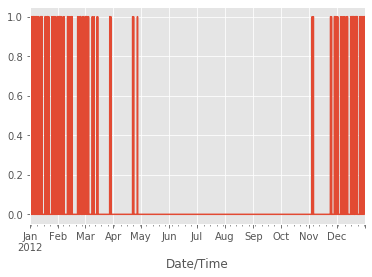

In [32]:
is_snow = is_snow.astype(float)
is_snow.plot()

### 6.2 Use resampling to find the snowiest month
If we wanted the median temperature each month, we could use the resample() method like this:

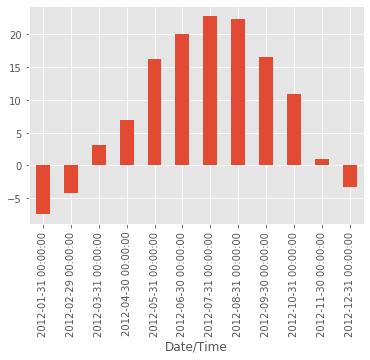

In [54]:
weather['Temp (C)'].astype(float).resample('M').apply(np.mean).plot(kind = 'bar')


Unsurprisingly, July and August are the warmest.

So think of snowiness as being a bunch of 1s and 0s instead of Trues and Falses:

In [52]:
is_snow.astype(float)[:10]

Date/Time
2012-01-01 00:00:00    0.0
2012-01-01 01:00:00    0.0
2012-01-01 02:00:00    0.0
2012-01-01 03:00:00    0.0
2012-01-01 04:00:00    0.0
2012-01-01 05:00:00    0.0
2012-01-01 06:00:00    0.0
2012-01-01 07:00:00    0.0
2012-01-01 08:00:00    0.0
2012-01-01 09:00:00    0.0
Name: Weather, dtype: float64

In [53]:
is_snow.astype(float).resample('M').apply(np.mean)

Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

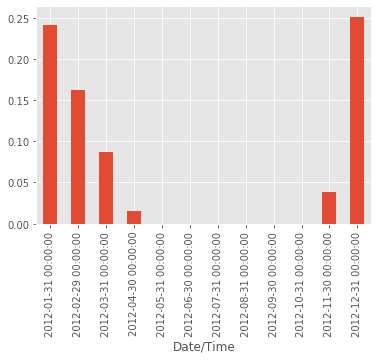

In [55]:
is_snow.astype(float).resample('M').apply(np.mean).plot(kind = 'bar')

In 2012, December was the snowiest month. This graph also suggests that it starts snowing pretty abruptly in November, and then tapers off slowly and takes a long time to stop, with the last snow usually being in April or May.

In [60]:
is_snow.astype(float)[:10]

Date/Time
2012-01-01 00:00:00    0.0
2012-01-01 01:00:00    0.0
2012-01-01 02:00:00    0.0
2012-01-01 03:00:00    0.0
2012-01-01 04:00:00    0.0
2012-01-01 05:00:00    0.0
2012-01-01 06:00:00    0.0
2012-01-01 07:00:00    0.0
2012-01-01 08:00:00    0.0
2012-01-01 09:00:00    0.0
Name: Weather, dtype: float64

### 6.3 Plotting temperature and snowiness stats together
We can also combine these two statistics (temperature, and snowiness) into one dataframe and plot them together:

In [64]:
temperature = weather['Temp (C)'].astype(float).resample('M').apply(np.median)
is_snow = weather['Weather'].str.contains('Snow')
snow = is_snow.astype(float).resample('M').apply(np.mean)

# Name the columns
temperature.name = "Temperature"
snow.name = "Snowiness"

In [66]:
stats = pd.concat([temperature, snow], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


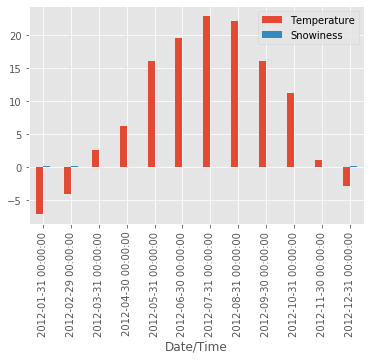

In [67]:
stats.plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002698882F888>,
      dtype=object)

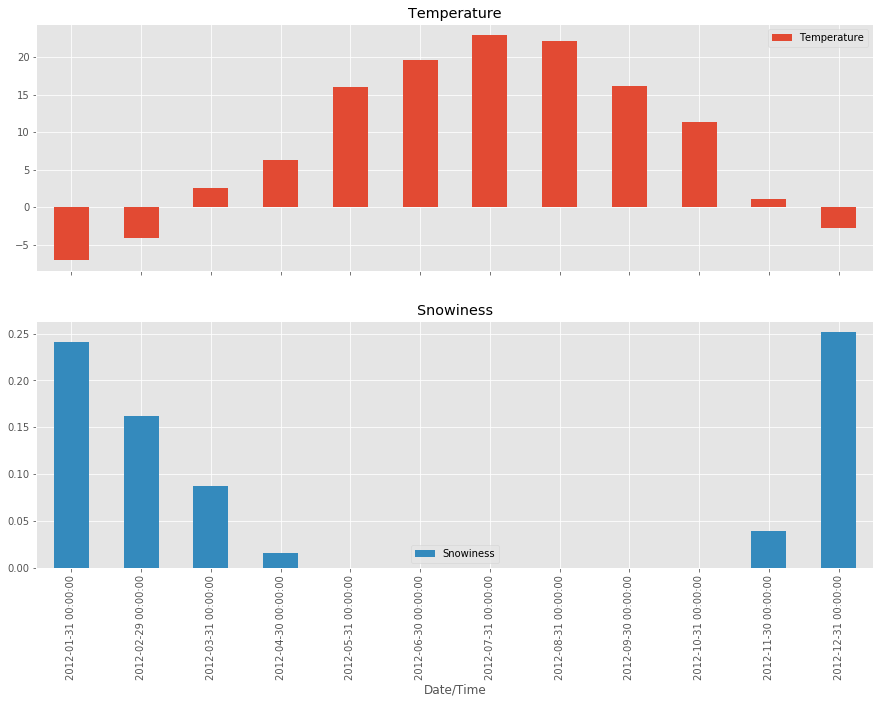

In [68]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))